In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlretrieve
%matplotlib inline

In [3]:
dataset_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [4]:
urlretrieve(dataset_url, 'medical-charges.csv')

('medical-charges.csv', <http.client.HTTPMessage at 0x7b0570499060>)

In [5]:
medical_df = pd.read_csv('medical-charges.csv')

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(
    medical_df,
    x="age",
    nbins=45,
    title="Age Distribution",
    color_discrete_sequence=["teal"],
    marginal="box",
)
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
# bmi
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [12]:
fig = px.histogram(
    medical_df,
    x="bmi",
    nbins=45,
    title="BMI Distribution",
    color_discrete_sequence=["teal"],
    marginal="box",
)

fig.update_layout(bargap=0.1)
fig.show()

# we can conclude there's somewhat normal/gaussian distribution here

In [13]:
# smokers vs non smokers and their sex

fig = px.histogram(
    medical_df,
    x="smoker",
    title="Smoker Distribution",
    color_discrete_sequence=["rgba(255, 0, 0, 0.35)", "rgba(0, 255, 39, 0.35)"],
    color="sex",
)

fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    opacity=0.7,
    title="Age vs Charges",
    color_continuous_scale="Viridis",
)

fig.show()

In [15]:
fig = px.scatter(
    medical_df,
    x='charges',
    y="bmi",
    color="age",
    opacity=0.8,
    title="BMI vs Charges",
    color_continuous_scale="Viridis",
)

fig.show()

## Correlation

In [16]:
medical_df.age.corr(medical_df.charges)

0.29900819333064754

In [17]:
numeric_data = medical_df.copy()
smoker_map = {'yes': 1, 'no': 0}
sex_map = {'male': 1, 'female': 0}
numeric_data.smoker = numeric_data.smoker.map(smoker_map)
numeric_data.sex = numeric_data.sex.map(sex_map)

In [18]:
corr_subset = numeric_data[['age', 'bmi', 'charges', 'smoker', 'sex']]
corr_subset.corr()

,age,bmi,charges,smoker,sex
age,1.000000,0.109272,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.198341,0.003750,0.046371
charges,0.299008,0.198341,1.000000,0.787251,0.057292
smoker,-0.025019,0.003750,0.787251,1.000000,0.076185
sex,-0.020856,0.046371,0.057292,0.076185,1.000000


<Axes: >

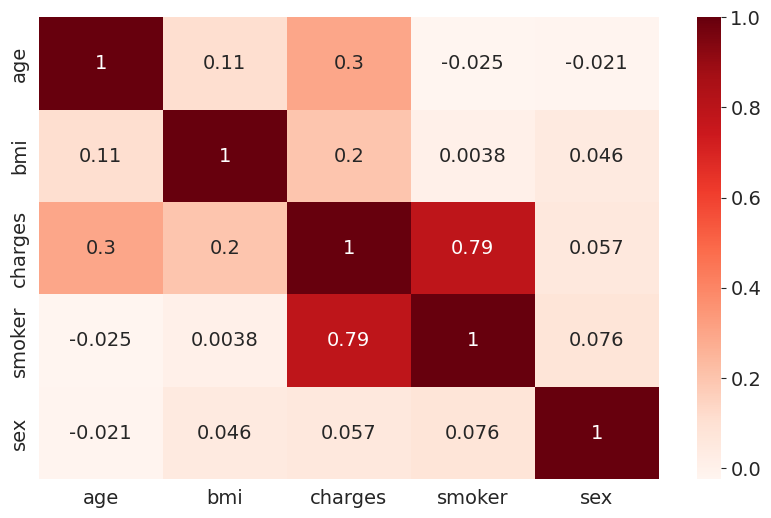

In [19]:
sns.heatmap(corr_subset.corr(), annot=True, cmap="Reds")

In [20]:
non_smokers = medical_df[medical_df.smoker == "no"]

In [21]:
px.scatter(non_smokers, x=non_smokers["age"], y=non_smokers["charges"], opacity=0.8)

In [22]:
def calc_estimated_charges(age, slope, intercept):
    return slope * age + intercept

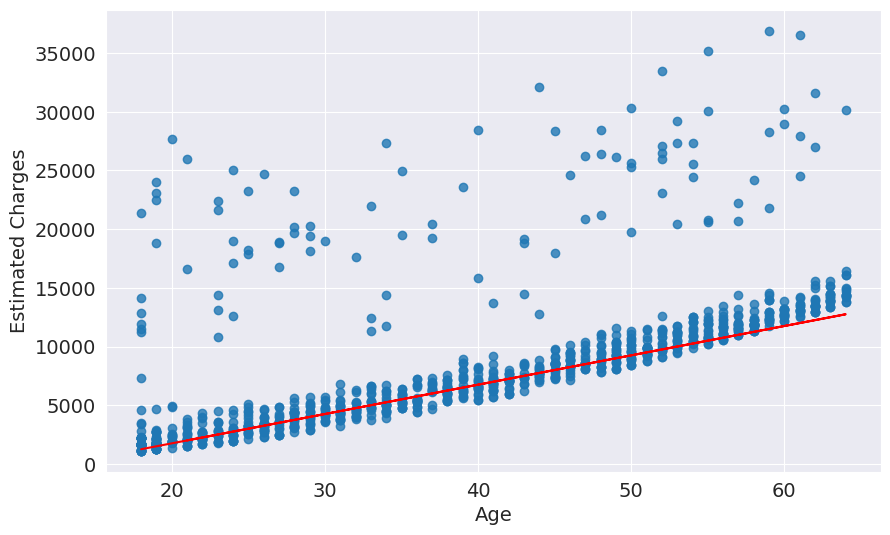

In [23]:
slope = 250
intercept = -3250

ages = non_smokers["age"]
estimated_charges = calc_estimated_charges(ages, slope, intercept)

plt.plot(ages, estimated_charges, "r")
plt.xlabel("Age")
plt.ylabel("Estimated Charges")

plt.scatter(non_smokers["age"], non_smokers["charges"], alpha=0.8)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [25]:
model = LinearRegression()

In [26]:
inputs = non_smokers[['age']]
targets = non_smokers.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [27]:
model.fit(inputs, targets)

LinearRegression()

In [28]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [29]:
non_smokers.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [30]:
def compute_rmse(targets, predictions):
    return np.sqrt(((targets - predictions) ** 2).mean())

In [31]:
compute_rmse(targets, predictions)

4662.505766636395

In [32]:
model.coef_
model.intercept_

-2091.4205565650864

5017.560833880577

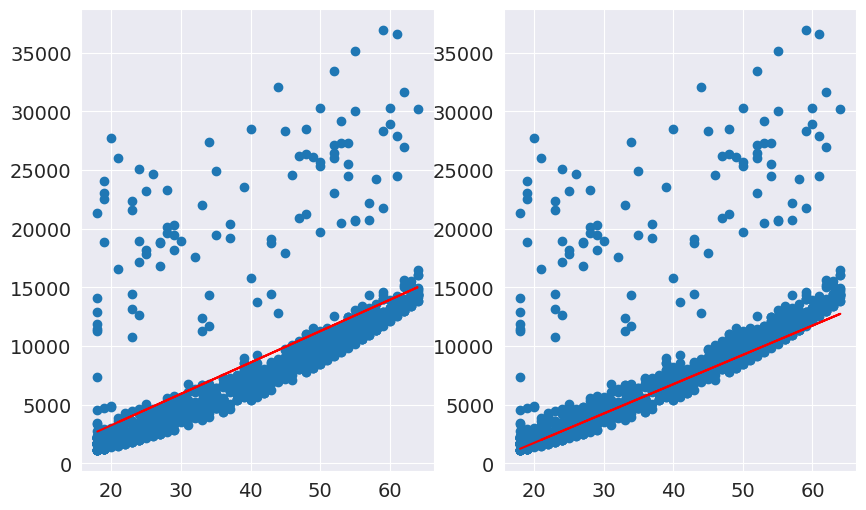

In [33]:
plt.subplot(1, 2, 1)
plt.scatter(x=non_smokers.age, y=non_smokers.charges)
plt.plot(inputs, predictions, color='red')
compute_rmse(targets, predictions)

plt.subplot(1, 2, 2)
plt.scatter(x=non_smokers.age, y=non_smokers.charges)
plt.plot(inputs, estimated_charges, color='red')
compute_rmse(targets, estimated_charges)


In [34]:
model2 = SGDRegressor()

In [35]:
model2.fit(inputs, targets)

SGDRegressor()

In [36]:
predictions1 = model2.predict(inputs)
predictions1

array([ 6338.75113071,  8782.50606565, 10004.38353313, ...,
        6338.75113071,  6338.75113071,  7071.87761119])

In [37]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

## For smokers

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
smokers = medical_df[medical_df.smoker == "yes"]

In [40]:
px.scatter(smokers, x=smokers["age"], y=smokers["charges"], opacity=0.8)

In [41]:
inputs = smokers[['age']]
targets = smokers.charges
print(inputs.shape, targets.shape)

(274, 1) (274,)


In [42]:
 model.fit(inputs, targets)

LinearRegression()

In [43]:
smokers_prediction = model.predict(inputs)


10711.00334810241

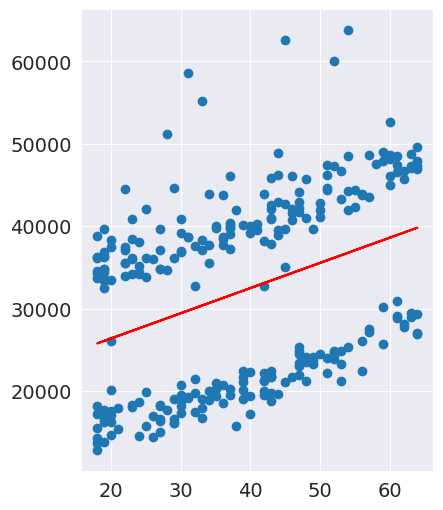

In [44]:
plt.subplot(1, 2, 1)
plt.scatter(x=smokers.age, y=smokers.charges)
plt.plot(inputs, smokers_prediction, color='red')
compute_rmse(targets, smokers_prediction)


# Model with multiple params

<Axes: >

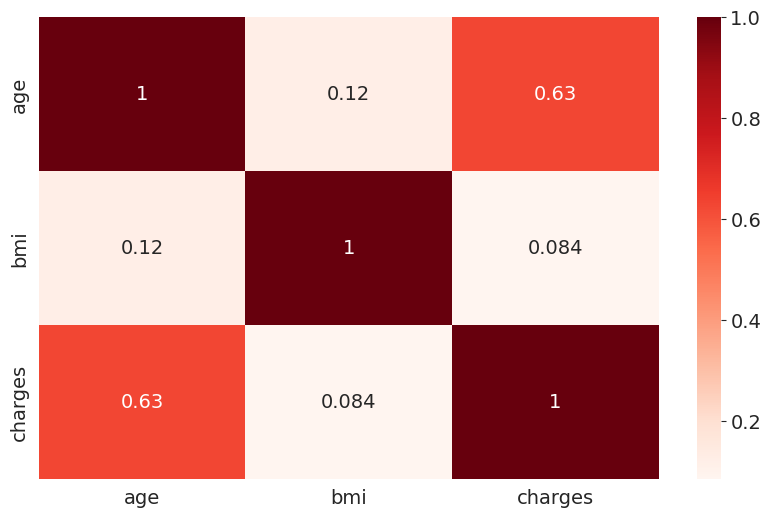

In [45]:
num_data = non_smokers[["age", "bmi", "charges"]]
sns.heatmap(num_data.corr(), annot=True, cmap="Reds")

In [46]:
inputs = non_smokers[["age", "bmi"]]
targets = non_smokers.charges

In [47]:
model = LinearRegression().fit(inputs, targets)

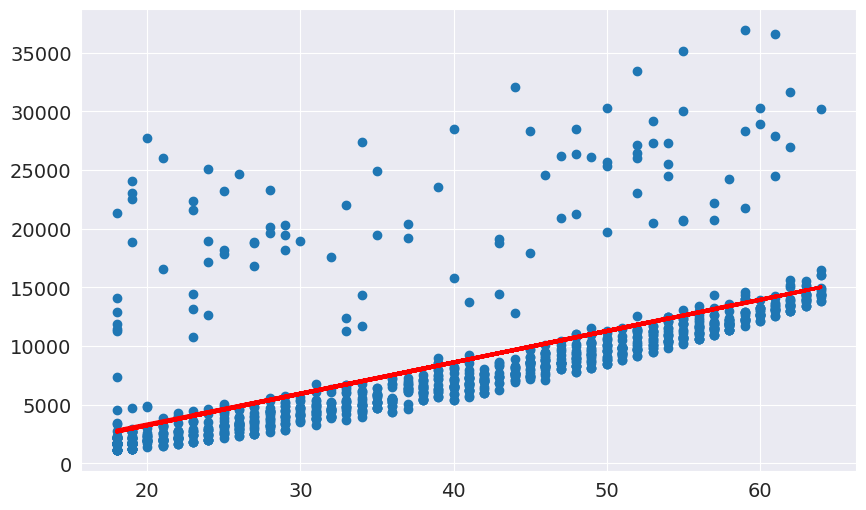

In [48]:
plt.scatter(x=non_smokers.age, y=non_smokers.charges)
plt.plot(inputs.age, model.predict(inputs), color='red')

# For all customers, both smokers and non_smokers

In [49]:
inputs = medical_df[["age", "bmi", "children"]]
targets = medical_df.charges
print(inputs.shape, targets.shape)

(1338, 3) (1338,)


In [50]:
model = LinearRegression().fit(inputs, targets)

In [51]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

11355.317901125973

In [52]:
px.scatter(medical_df, x="age", y="charges", color="smoker")

# Categorical data

In [53]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
smoker_codes = {"yes" : 1, "no": 0}
medical_df["smoker_code"] = medical_df.smoker.map(smoker_codes)

In [55]:
inputs = medical_df[["age", "bmi", "smoker_code"]]
targets = medical_df.charges
print(inputs.shape, targets.shape)

(1338, 3) (1338,)


<Axes: xlabel='children', ylabel='charges'>

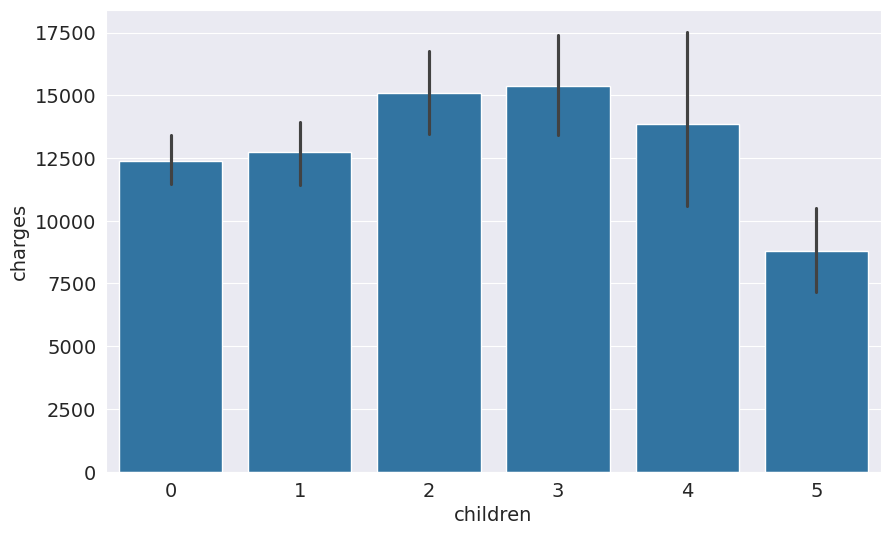

In [56]:
sns.barplot(x=medical_df.children, y=medical_df.charges)

In [57]:
inputs = medical_df[["age","smoker_code", "children", "bmi"]]
target = medical_df.charges
print(inputs.shape, target.shape)

(1338, 4) (1338,)


In [58]:
model = LinearRegression().fit(inputs, target)

In [59]:
predictions = model.predict(inputs)
compute_rmse(target, predictions)

6056.439217188081

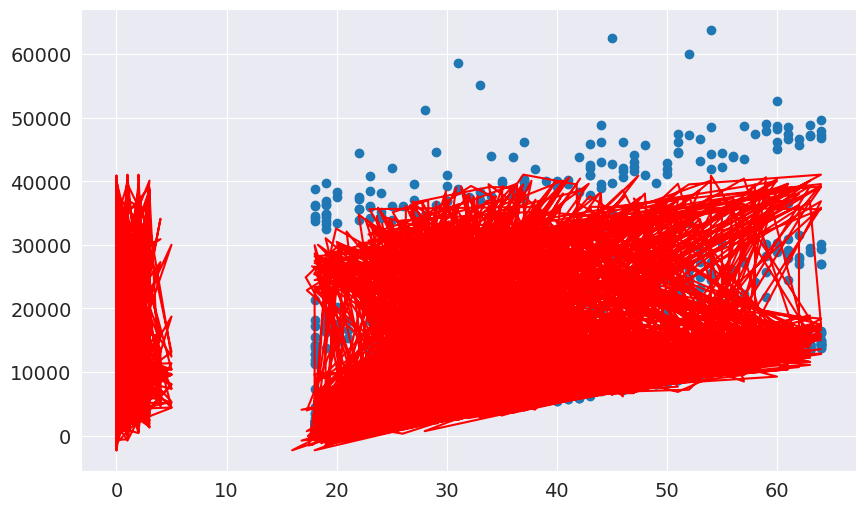

In [60]:
plt.scatter(x=medical_df.age, y=medical_df.charges)
plt.plot(inputs, predictions, color='red')

<Axes: xlabel='sex', ylabel='charges'>

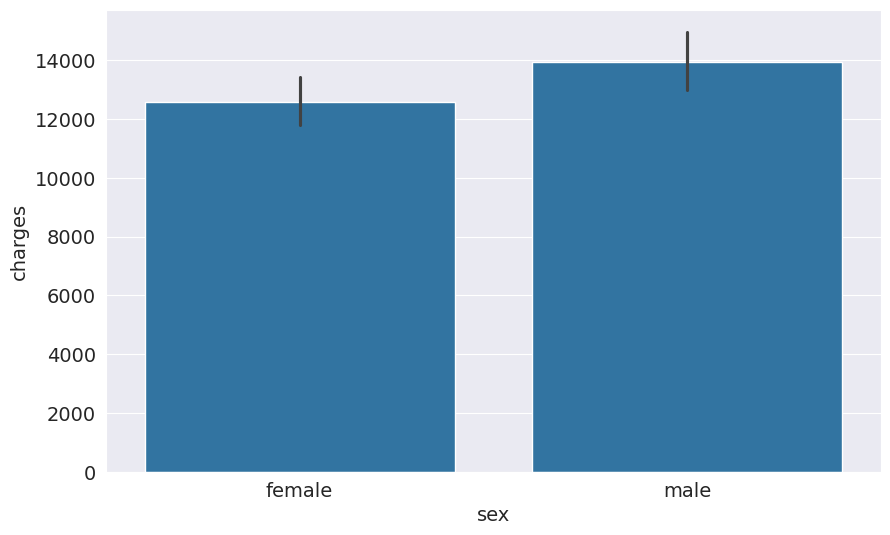

In [61]:
sns.barplot(x=medical_df.sex, y=medical_df.charges)

In [62]:
sex_codes = {"male" : 1, "female": 0}
medical_df["sex_code"] = medical_df.sex.map(sex_codes)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [63]:
inputs = medical_df[["age","smoker_code", "children", "sex_code", "bmi"]]
target = medical_df.charges
print(inputs.shape, target.shape)

(1338, 5) (1338,)


In [64]:
model = LinearRegression().fit(inputs, targets)

In [65]:
predictions = model.predict(inputs)
compute_rmse(target, predictions)

6056.100708754546

In [66]:
# One hot encoding
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [67]:
from sklearn import preprocessing

In [68]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [69]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [70]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [71]:
inputs = medical_df[["age","smoker_code", "children", "sex_code", "bmi", "northeast", "northwest", "southeast", "southwest"]]
target = medical_df.charges
print(inputs.shape, target.shape)

(1338, 9) (1338,)


In [72]:
model = LinearRegression().fit(inputs, targets)

In [73]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

6041.679651174452

# Seperate models

## Non Smokers

In [74]:
non_smokers_df = medical_df[medical_df.smoker == "no"]
non_smokers_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0


In [75]:
fig = px.scatter(non_smokers_df, x=non_smokers_df.age, y=non_smokers_df.charges)
fig.update_layout(bargap=0.1)
fig.show()

1. inputs - age

In [76]:
inputs = non_smokers_df[["age"]]
targets = non_smokers_df.charges
print(inputs.shape, targets.shape)

(1064, 1) (1064,)


In [77]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)

LinearRegression()

In [78]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

4662.505766636395

Inputs - With age and bmi



In [79]:
inputs = non_smokers_df[["age", "bmi"]]
targets = non_smokers_df.charges
print(inputs.shape, targets.shape)

(1064, 2) (1064,)


In [80]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)

LinearRegression()

In [81]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

4662.3128354612945

Inputs - With age, bmi, children

In [82]:
inputs = non_smokers_df[["age", "bmi", "children"]]
targets = non_smokers_df.charges
print(inputs.shape, targets.shape)

(1064, 3) (1064,)


In [83]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)

LinearRegression()

In [84]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

4608.470405038247

Inputs - Include regions

In [85]:
inputs = medical_df[["age", "bmi", "children", "northeast", "northwest", "southeast", "southwest"]]
targets = medical_df.charges
print(inputs.shape, targets.shape)

(1338, 7) (1338,)


In [86]:
model = LinearRegression().fit(inputs, targets)
model.fit(inputs, targets)

LinearRegression()

In [87]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

11333.372237378664

> Model with input params - Age, BMI and No. of children works well

## Smokers

In [88]:
smokers_df = medical_df[medical_df.smoker == "yes"]
smokers_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,1,0,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,1,0,1.0,0.0,0.0,0.0


In [89]:
input_cols = ["age", "bmi", "children", "northeast", "northwest", "southeast", "southwest", "sex_code"]
inputs = smokers_df[["age", "bmi", "northeast", "northwest", "southeast", "southwest", "children", "sex_code"]]
targets = smokers_df.charges
print(inputs.shape, targets.shape)

(274, 8) (274,)


In [90]:
model = LinearRegression().fit(inputs, targets)


In [91]:
predictions = model.predict(inputs)
compute_rmse(targets, predictions)

5668.4678821121515

In [92]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,267.404386
1,bmi,1475.545630
2,children,754.585021
3,northeast,64.866996
4,northwest,-1138.153497
5,southeast,318.701480
6,southwest,182.736551
7,sex_code,-388.121649
8,1,-23426.354339


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [95]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [96]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [97]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [98]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [103]:
inputs = pd.DataFrame(np.concatenate((scaled_inputs, categorical_data), axis=1))
targets = medical_df.charges
print(inputs.shape, targets.shape)

(1338, 9) (1338,)


In [100]:
model = LinearRegression().fit(inputs, targets)

model.fit(inputs, targets)
predictions = model.predict(inputs)
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [101]:
compute_rmse(targets, predictions)

6041.6796511744515

In [102]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])